In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

In [2]:
df = pd.DataFrame({
    'CPU': json.load(open('../data/pcmark/software/result.json')),
    'GPU': json.load(open('../data/pcmark/hardware/result.json')),
}).transpose()

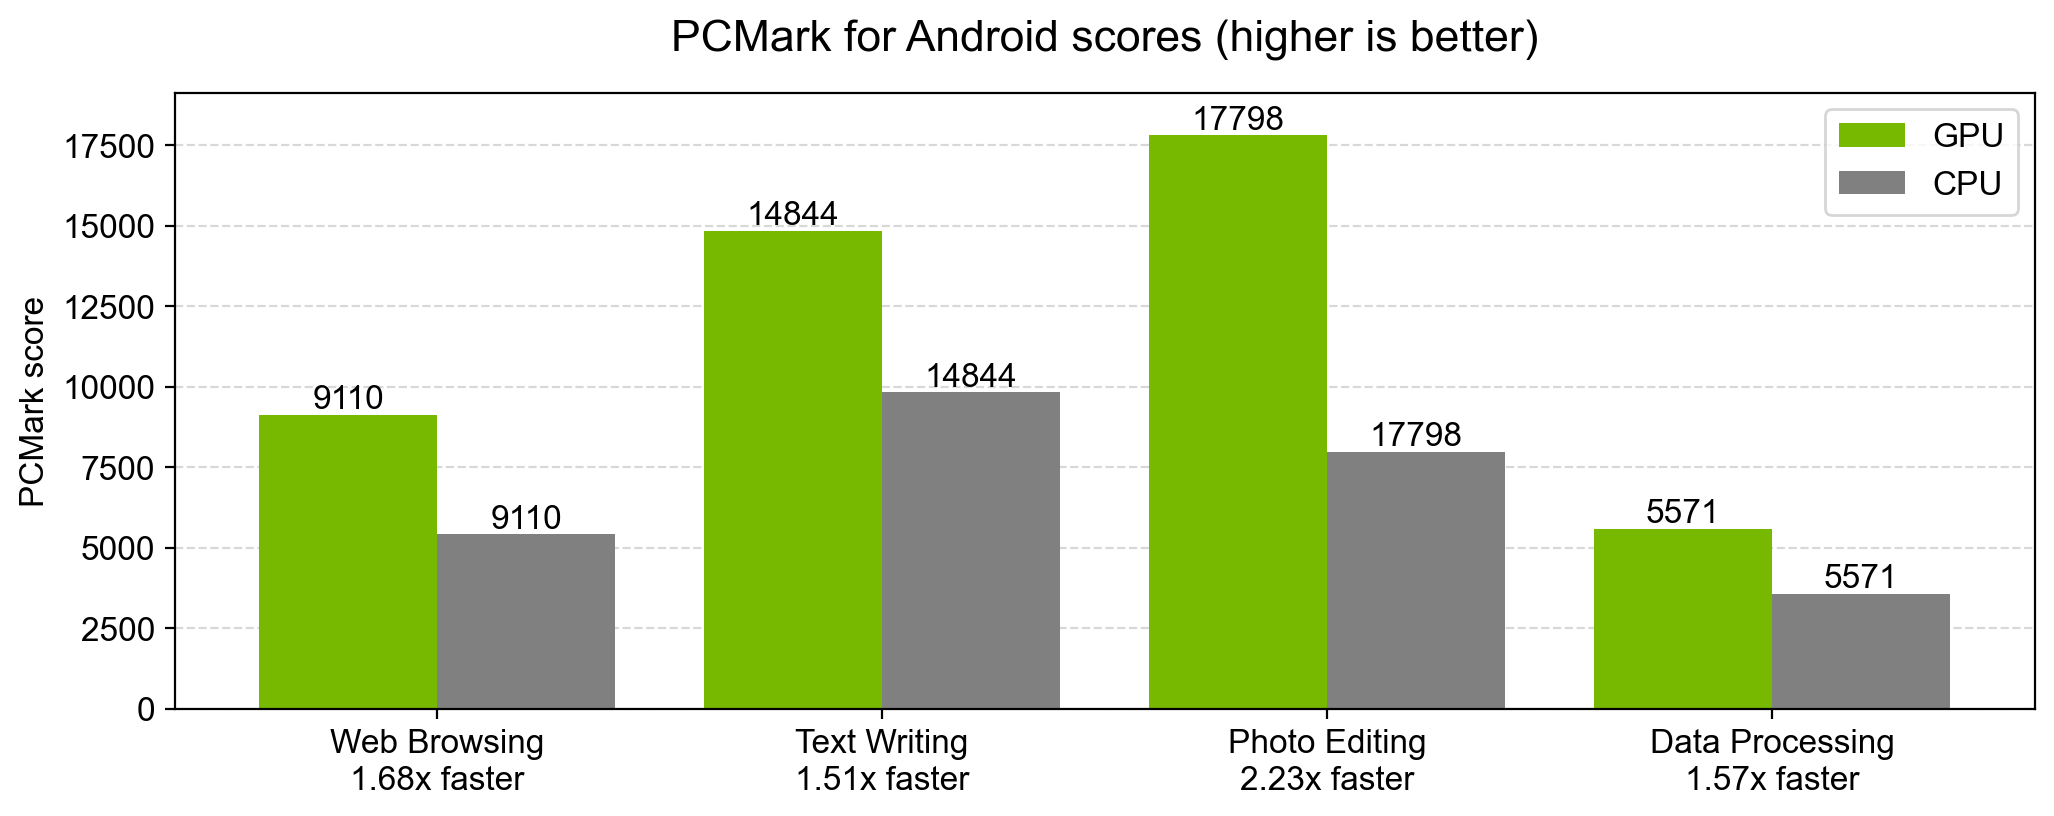

In [6]:
ax: plt.Axes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4), dpi=200)


plt.title("PCMark for Android scores (higher is better)", pad=15, size=16)
ax.set_axisbelow(True)

# x axis
cases = np.arange(len(df.columns))
ax.set_xticks(cases, df.columns)

# y axis
yticks = range(0, 18001, 2500)
ax.set_yticks(yticks)
ax.set_ylabel("PCMark score")
ax.grid(axis='y', which='major', visible=True, linestyle='--', color='grey', alpha=0.3)

# bars
ax.bar(cases - 0.2, df.loc['GPU'], 0.4, label='GPU', color='#76B900')
ax.bar(cases + 0.2, df.loc['CPU'], 0.4, label='CPU', color='grey')
ax.legend()

for i, case in enumerate(df.columns):
    kw = { 'color': 'black', 'horizontalalignment': 'center' }
    df_case = df.loc[:, case]

    # absolute values
    ax.text(i - 0.2, df_case['GPU'] + 200, round(df_case['GPU'], 2), **kw)
    ax.text(i + 0.2, df_case['CPU'] + 200, round(df_case['GPU'], 2), **kw)

    # speedup
    speedup = df_case['GPU'] / df_case['CPU']
    ax.text(i, -2500, f'{round(speedup, 2)}x faster', **kw)

ax.margins(0.05, 0.075)
plt.show()
